# AMS 528 Homework 3
**submitted by Jiaxi Zhao on 5th April, 2021**

In [2]:
import numpy as np
import numpy.linalg as alg
import sympy as sp
from math import ceil
from scipy.linalg import solve_triangular as ss
from sympy import *
from matplotlib import pyplot as plt 
%matplotlib inline

## Upwind scheme

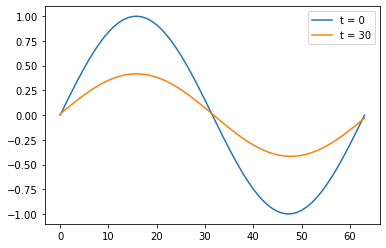

In [79]:
L = 1
N = 64
dt = 0.01
dx = L / N
a  = -0.1
u  = np.zeros(N + 1)
u[:N]  = np.sin(np.linspace(0, L, N) * 2 * np.pi)      # initial value, periodic domain
u[N] = u[0]
plt.plot(u[:N], label = 't = 0')

# simulation
for i in range(3000):
    u[:N] -= dt * a * (u[1:] - u[:N]) / dx 
    u[N] = u[0] 
    
plt.plot(u[:N], label = 't = 30')
plt.legend()
plt.show()

\begin{remark}
    It is easy to figure out that the first order scheme has strong dissipation.
\end{remark}

## Dispersive properties of 2nd order schemes
In this part, we will study the following linear advection equation
\begin{equation}
    \begin{aligned}
        v_t + v_x = 0,  
    \end{aligned}
\end{equation}
with following initial conditions
\begin{equation}
    \begin{aligned}
        v(x, 0) & = \left\{\begin{aligned}
            & \cos^2 (\pi(x - 1)), \quad -0.5 \leq x \leq 0.5, \\
            & 0, \quad \text{otherwise}
            \end{aligned}\right.    \\
        v(x, 0) & = \left\{\begin{aligned}
            & 1, \quad -0.5 \leq x \leq 0.5, \\
            & 0, \quad \text{otherwise}
            \end{aligned}\right.
    \end{aligned}
\end{equation}
We implement the following three second order numerical scheme and compare their performance and numerical dispersive.
\begin{itemize}
    \item Lax-Wendroff scheme
    \item Beam-Warming scheme
    \item Leapfrog scheme
\end{itemize}

### Lax-Wendroff scheme
The Las-Wendroff scheme is derived by expansion of the $v$ into second order, which is given explicitly by
\begin{equation}
    v_k^{n + 1} = v_k^n - \frac{\Delta t}{2\Delta x}(v_{k + 1}^{n} - v_{k - 1}^{n}) + \frac{(\Delta t)^2}{2(\Delta x)^2}(v_{k + 1}^{n} + v_{k - 1}^{n} - 2v_k^n).
\end{equation}

<td> 6.30e-02 </td>
<td> 3.05e-02 </td>
<td> 6.38e-02 </td>
<td> 2.44e-02 </td>
<td> 6.44e-02 </td>
<td> 1.96e-02 </td>


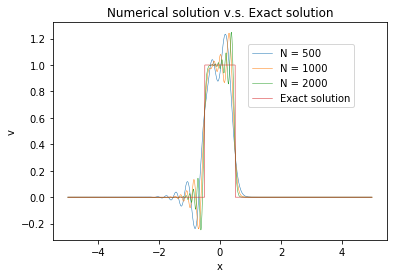

[0.015947998152753044, -0.320650392442641]


In [62]:
def LW(N, ax):
    x = np.linspace(-5, 5, N + 1)
    dx = 10 / N
    R = 0.75
    dt = dx * R
    T  = 30

    # initial condition
    v = np.zeros(N + 2)
    #v[ceil(0.45 * N) + 1: floor(0.55 * N) + 1] = (np.cos(np.pi * x[ceil(0.45 * N): floor(0.55 * N)])) ** 2
    v[ceil(0.45 * N) + 1: floor(0.55 * N) + 1] = 1
    v_truth = v.copy()

    for t in range(int(T / dt)):
        v[1:-1] = v[1:-1] + R * (v[:-2] - v[2:]) / 2 + R * R * (v[:-2] + v[2:] - 2 * v[1:-1]) / 2
        v[0] = v[-2]
        v[-1] = v[1]

    error_inf = np.max(v_truth - v)
    error_l2 = alg.norm(v_truth - v) * np.sqrt(dx)
    print('<td>',format(error_inf/10,'.2e'),'</td>')
    print('<td>',format(error_l2/10,'.2e'),'</td>')

    ax.plot(x[:-1], v[1:-1], linewidth=0.5, label = 'N = ' + str(N))
    if N == 2000:
        ax.plot(x[:-1], v_truth[1:-1], linewidth=0.5,label = 'Exact solution')
    return [error_inf, error_l2]

fig = plt.figure()
ax  = fig.add_subplot(111)
error = np.zeros([3, 2])
error[0, :] = LW(500, ax)
error[1, :] = LW(1000, ax)
error[2, :] = LW(2000, ax)
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
ax.legend(bbox_to_anchor = (.9, 0.9), loc = 'upper right', borderaxespad = 0.)
plt.show()

x       = np.log(np.array([500, 1000, 2000]))
A       = np.vstack([x, np.ones(len(x))]).T
m1, c   = np.linalg.lstsq(A, np.log(error[:, 0]), rcond = -1)[0]
m2, c   = np.linalg.lstsq(A, np.log(error[:, 1]), rcond = -1)[0]
print([m1, m2])

<table border="1" align="center"><tbody>
    <tr>
        <th>IC1 </th>
        <th>$l_{\infty}$</th>
        <th>$l_{2,\Delta x}$</th>
    </tr>
    <tr>
        <td>$500$ grids</td>
        <td> 1.22e-02 </td>
        <td> 8.25e-03 </td>
    </tr>
    <tr>
        <td>$1000$ grids</td>
        <td> 3.64e-03 </td>
        <td> 2.39e-03 </td>
    </tr>
    <tr>
        <td>$2000$ grids</td>
        <td> 1.36e-03 </td>
        <td> 6.83e-04 </td>
    </tr>
    <tr>
        <td>Convergence</td>
        <td> 1.58 </td>
        <td> 1.80 </td>
    </tr>
</table> 
<table border="1" align="center"><tbody>
    <tr>
        <th>IC1 </th>
        <th>$l_{\infty}$</th>
        <th>$l_{2,\Delta x}$</th>
    </tr>
    <tr>
        <td>$500$ grids</td>
        <td> 6.30e-02 </td>
        <td> 3.05e-02 </td>
    </tr>
    <tr>
        <td>$1000$ grids</td>
        <td> 6.38e-02 </td>
        <td> 2.44e-02 </td>
    </tr>
    <tr>
        <td>$2000$ grids</td>
        <td> 6.44e-02 </td>
        <td> 1.96e-02 </td>
    </tr>
    <tr>
        <td>Convergence</td>
        <td> -0.016 </td>
        <td> 0.32 </td>
    </tr>
</table> 

### Beam-Warming scheme
The Beam-Warming is derived by expansion of the $v$ into second order, which is given explicitly by
\begin{equation}
    v_k^{n + 1} = v_k^n - \frac{\Delta t}{2\Delta x}(3v_{k}^{n} + v_{k - 2}^{n} - 4v_{k - 1}^{n}) + \frac{(\Delta t)^2}{2(\Delta x)^2}(v_{k}^{n} + v_{k - 2}^{n} - 2v_{k - 1}^n).
\end{equation}

<td> 6.78e-02 </td>
<td> 3.20e-02 </td>
<td> 6.76e-02 </td>
<td> 2.53e-02 </td>
<td> 6.74e-02 </td>
<td> 2.01e-02 </td>


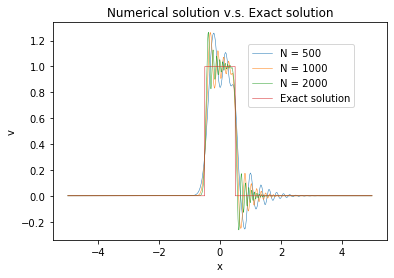

[-0.004561011804695196, -0.33531080969552585]


In [96]:
def BW(N, ax):
    x = np.linspace(-5, 5, N + 1)
    dx = 10 / N
    dt = dx * .75
    T  = 30
    R = dt / dx

    # initial condition
    v = np.zeros(N + 3)
    v[ceil(0.45 * N) + 2: floor(0.55 * N) + 2] = 1
    #v[ceil(0.45 * N) + 2: floor(0.55 * N) + 2] = (np.cos(np.pi * x[ceil(0.45 * N): floor(0.55 * N)])) ** 2
    v_truth = v.copy()

    for t in range(int(T / dt) + 1):
        v[2:-1] = v[2:-1] + R * (4 * v[1:-2] - v[:-3] - 3 * v[2:-1]) / 2 \
                          + R * R * (v[2:-1] + v[:-3] - 2 * v[1:-2]) / 2
        v[0] = v[-3]
        v[1] = v[-2]
        v[-1] = v[2]

    error_inf = np.max(v_truth - v)
    error_l2 = alg.norm(v_truth - v) * np.sqrt(dx)
    print('<td>',format(error_inf/10,'.2e'),'</td>')
    print('<td>',format(error_l2/10,'.2e'),'</td>')

    ax.plot(x[:-1], v[2:-1], linewidth=0.5, label = 'N = ' + str(N))
    if N == 2000:
        ax.plot(x[:-1], v_truth[2:-1], linewidth=0.5,label = 'Exact solution')
    return [error_inf, error_l2]

fig = plt.figure()
ax  = fig.add_subplot(111)
error = np.zeros([3, 2])
error[0, :] = BW(500, ax)
error[1, :] = BW(1000, ax)
error[2, :] = BW(2000, ax)
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
ax.legend(bbox_to_anchor = (.9, 0.9), loc = 'upper right', borderaxespad = 0.)
plt.show()

x       = np.log(np.array([500, 1000, 2000]))
A       = np.vstack([x, np.ones(len(x))]).T
m1, c   = np.linalg.lstsq(A, np.log(error[:, 0]), rcond = -1)[0]
m2, c   = np.linalg.lstsq(A, np.log(error[:, 1]), rcond = -1)[0]
print([m1, m2])

<table border="1" align="center"><tbody>
    <tr>
        <th>IC1(R = 0.75) </th>
        <th>$l_{\infty}$</th>
        <th>$l_{2,\Delta x}$</th>
    </tr>
    <tr>
        <td>$500$ grids</td>
        <td> 9.68e-03 </td>
        <td> 6.24e-03 </td>
    </tr>
    <tr>
        <td>$1000$ grids</td>
        <td> 2.78e-03 </td>
        <td> 1.78e-03 </td>
    </tr>
    <tr>
        <td>$2000$ grids</td>
        <td> 1.10e-03 </td>
        <td> 5.10e-04 </td>
    </tr>
    <tr>
        <td>Convergence</td>
        <td> 1.57 </td>
        <td> 1.81 </td>
    </tr>
</table> 
<table border="1" align="center"><tbody>
    <tr>
        <th>IC2(R = 0.75) </th>
        <th>$l_{\infty}$</th>
        <th>$l_{2,\Delta x}$</th>
    </tr>
    <tr>
        <td>$500$ grids</td>
        <td> 6.33e-02 </td>
        <td> 2.99e-02 </td>
    </tr>
    <tr>
        <td>$1000$ grids</td>
        <td> 6.40e-02 </td>
        <td> 2.43e-02 </td>
    </tr>
    <tr>
        <td>$2000$ grids</td>
        <td> 6.46e-02 </td>
        <td> 1.95e-02 </td>
    </tr>
    <tr>
        <td>Convergence</td>
        <td> -0.014 </td>
        <td> 0.31 </td>
    </tr>
</table> 

### Leapfrog scheme
We use the BTCS scheme and obtain numerical solutions at time $t = 0.02$ using the number of numerical points N and time steps as in the tables below. The numerical scheme is given by 
\begin{equation}
    \frac{v_k^{n + 1} - v_k^n}{\Delta t} = \frac{v_{k + 1}^{n + 1} + v_{k - 1}^{n + 1} - 2v_k^{n + 1}}{( \Delta x )^2},
\end{equation}

[0.02384391242788747, 0.05342313583590141]
[9.880984919163893e-14, 2.985368564791431e-13]
[8.43769498715119e-15, 1.8284651894784302e-14]


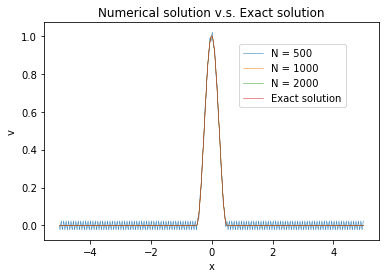

[-20.68091863829595, -20.704984319896436]


In [69]:
def Leapfrog(N, ax):
    x = np.linspace(-5, 5, N + 1)
    dx = 10 / N
    dt = dx * 0.75
    T  = 30
    R = dt / dx

    # initial condition
    v = np.zeros(N + 2)
    v_ = np.zeros(N + 2)
    #v[ceil(0.45 * N) + 1: floor(0.55 * N) + 1] = 1 
    v[ceil(0.45 * N) + 1: floor(0.55 * N) + 1] = (np.cos(np.pi * x[ceil(0.45 * N): floor(0.55 * N)])) ** 2
    v_truth = v.copy()
    # upwind for one step
    v_[1:-1] = v[1:-1] + R * (v[:-2] - v[2:]) / 2
    v_[0] = v_[-2]
    v_[-1] = v_[1]

    for t in range(1, int(T / dt)):
        tmp = v_.copy()
        v_[1:-1] = v[1:-1] + R * (v_[:-2] - v_[2:])
        v_[0] = v_[-2]
        v_[-1] = v_[1]
        v = tmp

    error_inf = np.max(v_truth - v_)
    error_l2 = alg.norm(v_truth - v_) * np.sqrt(dx)
    print([error_inf, error_l2])

    ax.plot(x[:-1], v_[1:-1], linewidth=0.5, label = 'N = ' + str(N))
    if N == 2000:
        ax.plot(x[:-1], v_truth[1:-1], linewidth=0.5,label = 'Exact solution')
    return [error_inf, error_l2]

fig = plt.figure()
ax  = fig.add_subplot(111)
error = np.zeros([3, 2])
error[0, :] = Leapfrog(500, ax)
error[1, :] = Leapfrog(1000, ax)
error[2, :] = Leapfrog(2000, ax)
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
ax.legend(bbox_to_anchor = (.9, 0.9), loc = 'upper right', borderaxespad = 0.)
#plt.savefig('loss.jpg', dpi = 1000)
plt.show()

x       = np.log(np.array([500, 1000, 2000]))
A       = np.vstack([x, np.ones(len(x))]).T
m1, c   = np.linalg.lstsq(A, np.log(error[:, 0]), rcond = -1)[0]
m2, c   = np.linalg.lstsq(A, np.log(error[:, 1]), rcond = -1)[0]
print([m1, m2])

<table border="1" align="center"><tbody>
    <tr>
        <th>IC1 </th>
        <th>$500$ grids</th>
        <th>$1000$ grids</th>
        <th>$2000$ grids</th>
        <th>Convergence</th>
    </tr>
    <tr>
        <td>$l_{\infty}$</td>
        <td>0.310</td>
        <td>0.081</td>
        <td>0.023</td>
        <td>1.35</td>
    </tr>
    <tr>
        <td>$l_{2,\Delta x}$</td>
        <td>0.183</td>
        <td>0.052</td>
        <td>0.019</td>
        <td>1.09</td>
    </tr>
</table> 
<table border="1" align="center"><tbody>
    <tr>
        <th>IC2 </th>
        <th>$500$ grids</th>
        <th>$1000$ grids</th>
        <th>$2000$ grids</th>
        <th>Convergence</th>
    </tr>
    <tr>
        <td>$l_{\infty}$</td>
        <td>0.741</td>
        <td>0.641</td>
        <td>0.537</td>
        <td>0.126</td>
    </tr>
    <tr>
        <td>$l_{2,\Delta x}$</td>
        <td>0.340</td>
        <td>0.211</td>
        <td>0.085</td>
        <td>0.518</td>
    </tr>
</table>

## Conclusion

\begin{remark}
    Most of the experiment coincides with the prediction in 
\end{remark}